Accuracy: 99.86%
Average confidence for correct predictions: 1.00
Average confidence for incorrect predictions: 0.71


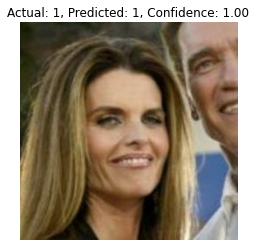

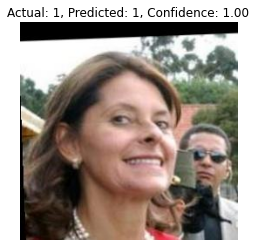

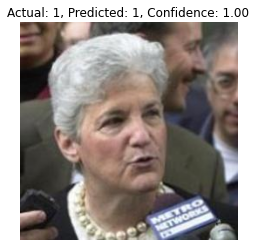

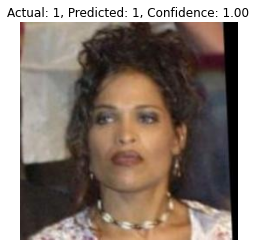

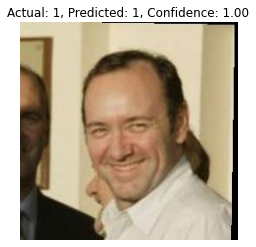

In [4]:
import os
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, Dataset
from torchvision import transforms
from PIL import Image
import numpy as np
import torch.nn.functional as F

# Custom dataset class for loading images and their labels
class CustomDataset(Dataset):
    def __init__(self, images, labels, transform=None):
        self.images = images
        self.labels = labels
        self.transform = transform

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        image = self.images[idx]
        label = self.labels[idx]
        if self.transform:
            image = self.transform(image)
        return image, label

# Simple CNN model definition
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.fc1 = nn.Linear(64 * 64 * 64, 128)
        self.fc2 = nn.Linear(128, 2)

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = x.view(-1, 64 * 64 * 64)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Function to load images from a specified folder
def load_images_from_folder(folder):
    images = []
    for subdir, _, files in os.walk(folder):
        for file in files:
            if file.lower().endswith(('.jpeg', '.jpg')):
                img_path = os.path.join(subdir, file)
                img = Image.open(img_path).convert('RGB')
                images.append(img)
    return images

# Function to convert numpy images to PIL images
def numpy_to_pil(images):
    pil_images = []
    for img in images:
        if isinstance(img, np.ndarray):
            img_normalized = img / 255.0 if img.max() > 1.0 else img
            img_uint8 = np.uint8(img_normalized * 255)
            pil_img = Image.fromarray(img_uint8)
        else:
            pil_img = img
        pil_images.append(pil_img)
    return pil_images

# Function to evaluate the model and display results
def evaluate_model(model_path, num_images_to_show, folder, label):
    # Load images and convert them to PIL format
    images = load_images_from_folder(folder)
    images_pil = numpy_to_pil(images)
    labels = [label] * len(images_pil)

    # Define the transformation
    transform = transforms.Compose([
        transforms.Resize((256, 256)),
        transforms.ToTensor(),
    ])

    # Create the dataset and dataloader
    dataset = CustomDataset(images_pil, labels, transform=transform)
    data_loader = DataLoader(dataset, batch_size=32, shuffle=False)

    # Load the model and set it to evaluation mode
    model = SimpleCNN()
    model.load_state_dict(torch.load(model_path))
    model.eval()

    correct = 0
    total = 0
    confidence_correct = []
    confidence_incorrect = []

    # Evaluate the model on the dataset
    with torch.no_grad():
        for images, labels in data_loader:
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            softmax_outputs = F.softmax(outputs, dim=1)
            for i in range(len(labels)):
                confidence = softmax_outputs[i][predicted[i]].item()
                if predicted[i] == labels[i]:
                    confidence_correct.append(confidence)
                else:
                    confidence_incorrect.append(confidence)

    accuracy = 100 * correct / total
    avg_confidence_correct = np.mean(confidence_correct) if confidence_correct else 0
    avg_confidence_incorrect = np.mean(confidence_incorrect) if confidence_incorrect else 0

    print(f'Accuracy: {accuracy:.2f}%')
    print(f'Average confidence for correct predictions: {avg_confidence_correct:.2f}')
    print(f'Average confidence for incorrect predictions: {avg_confidence_incorrect:.2f}')

    # Display the specified number of images along with predictions
    for i in range(min(num_images_to_show, len(images_pil))):
        img = images_pil[i]
        img_transformed = transform(img).unsqueeze(0)
        
        with torch.no_grad():
            output = model(img_transformed)
            _, predicted_label = torch.max(output.data, 1)
            confidence = F.softmax(output, dim=1)[0][predicted_label].item()

        plt.imshow(img)
        plt.title(f'Actual: {label}, Predicted: {predicted_label.item()}, Confidence: {confidence:.2f}')
        plt.axis('off')
        plt.show()

    return accuracy, avg_confidence_correct, avg_confidence_incorrect

# Parameters for evaluation
model_path = 'simple_cnn_model.pth'
num_images_to_show = 5
folder = 'temp_human_faces'
label = 1

# Run the evaluation
accuracy, avg_confidence_correct, avg_confidence_incorrect = evaluate_model(
    model_path=model_path, 
    num_images_to_show=num_images_to_show, 
    folder=folder, 
    label=label
)

Accuracy: 98.03%
Average confidence for correct predictions: 0.98
Average confidence for incorrect predictions: 0.77


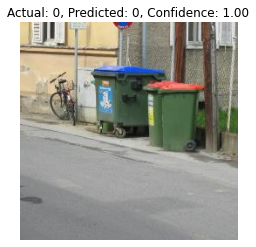

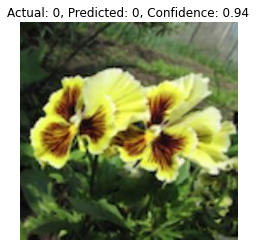

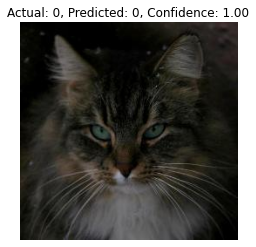

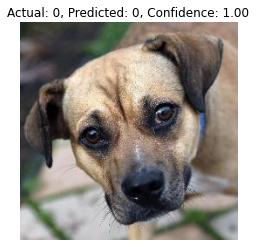

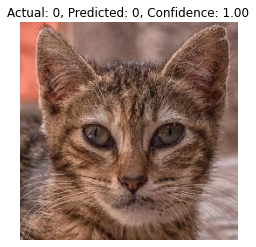

In [2]:
# Custom dataset class for loading images and their labels
class CustomDataset(Dataset):
    def __init__(self, images, labels, transform=None):
        self.images = images
        self.labels = labels
        self.transform = transform

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        image = self.images[idx]
        label = self.labels[idx]
        if self.transform:
            image = self.transform(image)
        return image, label

# Simple CNN model definition
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.fc1 = nn.Linear(64 * 64 * 64, 128)
        self.fc2 = nn.Linear(128, 2)

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = x.view(-1, 64 * 64 * 64)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Function to load images from a specified folder
def load_images_from_folder(folder):
    images = []
    for subdir, _, files in os.walk(folder):
        for file in files:
            if file.lower().endswith(('.jpeg', '.jpg')):
                img_path = os.path.join(subdir, file)
                img = Image.open(img_path).convert('RGB')
                images.append(img)
    return images

# Function to convert numpy images to PIL images
def numpy_to_pil(images):
    pil_images = []
    for img in images:
        if isinstance(img, np.ndarray):
            img_normalized = img / 255.0 if img.max() > 1.0 else img
            img_uint8 = np.uint8(img_normalized * 255)
            pil_img = Image.fromarray(img_uint8)
        else:
            pil_img = img
        pil_images.append(pil_img)
    return pil_images

# Function to evaluate the model and display results
def evaluate_model(model_path, num_images_to_show, folder, label):
    # Load images and convert them to PIL format
    images = load_images_from_folder(folder)
    images_pil = numpy_to_pil(images)
    labels = [label] * len(images_pil)

    # Define the transformation
    transform = transforms.Compose([
        transforms.Resize((256, 256)),
        transforms.ToTensor(),
    ])

    # Create the dataset and dataloader
    dataset = CustomDataset(images_pil, labels, transform=transform)
    data_loader = DataLoader(dataset, batch_size=32, shuffle=False)

    # Load the model and set it to evaluation mode
    model = SimpleCNN()
    model.load_state_dict(torch.load(model_path))
    model.eval()

    correct = 0
    total = 0
    confidence_correct = []
    confidence_incorrect = []

    # Evaluate the model on the dataset
    with torch.no_grad():
        for images, labels in data_loader:
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            softmax_outputs = F.softmax(outputs, dim=1)
            for i in range(len(labels)):
                confidence = softmax_outputs[i][predicted[i]].item()
                if predicted[i] == labels[i]:
                    confidence_correct.append(confidence)
                else:
                    confidence_incorrect.append(confidence)

    accuracy = 100 * correct / total
    avg_confidence_correct = np.mean(confidence_correct) if confidence_correct else 0
    avg_confidence_incorrect = np.mean(confidence_incorrect) if confidence_incorrect else 0

    print(f'Accuracy: {accuracy:.2f}%')
    print(f'Average confidence for correct predictions: {avg_confidence_correct:.2f}')
    print(f'Average confidence for incorrect predictions: {avg_confidence_incorrect:.2f}')

    # Display the specified number of images along with predictions
    for i in range(min(num_images_to_show, len(images_pil))):
        img = images_pil[i]
        img_transformed = transform(img).unsqueeze(0)
        
        with torch.no_grad():
            output = model(img_transformed)
            _, predicted_label = torch.max(output.data, 1)
            confidence = F.softmax(output, dim=1)[0][predicted_label].item()

        plt.imshow(img)
        plt.title(f'Actual: {label}, Predicted: {predicted_label.item()}, Confidence: {confidence:.2f}')
        plt.axis('off')
        plt.show()

    return accuracy, avg_confidence_correct, avg_confidence_incorrect

# Parameters for evaluation
model_path = 'simple_cnn_model.pth'
num_images_to_show = 5
folder = 'temp_non_human_faces'
label = 0

# Run the evaluation
accuracy, avg_confidence_correct, avg_confidence_incorrect = evaluate_model(
    model_path=model_path, 
    num_images_to_show=num_images_to_show, 
    folder=folder, 
    label=label
)

In [9]:
import os
import zipfile
import pandas as pd
import shutil

# Function to extract zip files
def extract_zip(file_path, extract_to):
    with zipfile.ZipFile(file_path, 'r') as zip_ref:
        zip_ref.extractall(extract_to)

# Path to the main zipped folder
main_zip_path = 'Adversal_Images.zip'
extract_main_folder = 'Adversal_Images_extracted'

# Extract the main zipped folder
extract_zip(main_zip_path, extract_main_folder)
results = []
for file in os.listdir(extract_main_folder):
    if file.endswith('.zip'):
        zip_path = os.path.join(extract_main_folder, file)
        extract_folder = os.path.join(extract_main_folder, file.replace('.zip', ''))
        extract_zip(zip_path, extract_folder)
        
        # Get the number associated with the folder
        folder_number = file.split('_')[-1].replace('.zip', '')
        print(f'Evaluating folder number: {folder_number}')
        
        # Run the evaluate_model function on the extracted subfolder
        accuracy, avg_confidence_correct, avg_confidence_incorrect = evaluate_model(
            model_path='simple_cnn_model.pth', 
            num_images_to_show=0,  
            folder=extract_folder, 
            label=1
        )
        
        # Append the results to the list
        results.append({
            'folder_number': folder_number,
            'accuracy': accuracy,
            'avg_confidence_correct': avg_confidence_correct,
            'avg_confidence_incorrect': avg_confidence_incorrect
        })
        shutil.rmtree(extract_folder)

# Convert the results to a pandas DataFrame
results_df = pd.DataFrame(results)

# Display the DataFrame
print(results_df)


Evaluating folder number: 0.25
Accuracy: 0.00%
Average confidence for correct predictions: 0.00
Average confidence for incorrect predictions: 1.00
Evaluating folder number: 0.06
Accuracy: 87.98%
Average confidence for correct predictions: 0.95
Average confidence for incorrect predictions: 0.89
Evaluating folder number: 0.01
Accuracy: 99.71%
Average confidence for correct predictions: 1.00
Average confidence for incorrect predictions: 0.99
Evaluating folder number: 0.4
Accuracy: 0.00%
Average confidence for correct predictions: 0.00
Average confidence for incorrect predictions: 1.00
Evaluating folder number: 0.3
Accuracy: 0.00%
Average confidence for correct predictions: 0.00
Average confidence for incorrect predictions: 1.00
Evaluating folder number: 0.16
Accuracy: 8.21%
Average confidence for correct predictions: 0.78
Average confidence for incorrect predictions: 0.97
Evaluating folder number: 0.35
Accuracy: 0.00%
Average confidence for correct predictions: 0.00
Average confidence for

In [10]:
results_df

,folder_number,accuracy,avg_confidence_correct,avg_confidence_incorrect
0,0.25,0.000000,0.000000,0.999998
1,0.06,87.976540,0.951724,0.887149
2,0.01,99.706745,0.995254,0.990957
3,0.4,0.000000,0.000000,1.000000
4,0.3,0.000000,0.000000,1.000000
5,0.16,8.211144,0.775629,0.972780
6,0.35,0.000000,0.000000,1.000000
7,0.09,65.982405,0.934221,0.895720
8,0.2,0.293255,0.600672,0.995922
9,0.5,0.000000,0.000000,1.000000
